In [1]:
Pkg.add("PGFPlots");
Pkg.add("Iterators");
Pkg.add("BayesNets");
Pkg.add("LightGraphs");
Pkg.add("TikzGraphs");
Pkg.add("Discretizers");
Pkg.add("RDatasets");
Pkg.add("Plots");

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of PGFPlots
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of Iterators
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of BayesNets
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of LightGraphs
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of TikzGraphs
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of Discretizers
INFO: Use `Pkg

In [2]:
using Iterators
using LightGraphs
using BayesNets
using PGFPlots
using TikzGraphs
using Discretizers
using RDatasets
using Plots

In [3]:
movieData = readtable("movie_metadata.csv");

In [4]:
#variables:
#Gross (query variable)
#Budget (evidence/input variable)
#Genre (evidence/input variable)
#IMDB score (evidence/input variable)
#Number of critic reviews (evidence/input variable)
#Number of Movie facebook likes
#Total cast facebook likes
#Number of faces in movie poster
#Director facebook likes
#Content rating
#Duration
#Title year


In [5]:
##### MANUAL BINNING #####

titleYear_edges = [1980,2000,2005,2010,2020]

budget_edges = [0,10000001,35000001,300000001]

gross_edges = [0,10000000,50000000,200000000,500000000,800000000]

duration_edges = [91,121,151,331]

numMovieFacebookLikes_edges = [1,10000,400000]

directorFacebookLikes_edges = [1,10000,40000]

castMovieLikes_edges = [100,10000,40000,700000]

numFacesInPoster_edges = [1,2,6,20]

imdbScore_edges = [3.1,4.1,5.1,6.1,7.1,8.1,9.1,10]

critic_edges = [101,201,301,401,820]

5-element Array{Int64,1}:
 101
 201
 301
 401
 820

In [ ]:
##### UNIFORM WIDTH BINNING #####
#nbinsLarge = 7
#nbinsSmall = 3

titleYear_bins = 5
titleYear_edges = binedges(DiscretizeUniformWidth(titleYear_bins), movieData[:title_year])

budget_bins = 3
budget_edges = binedges(DiscretizeUniformWidth(budget_bins), movieData[:budget])

gross_bins = 5
gross_edges = binedges(DiscretizeUniformWidth(gross_bins), movieData[:gross])

duration_bins = 4
duration_edges = binedges(DiscretizeUniformWidth(duration_bins), movieData[:duration])

numMovieFacebookLikes_bins = 3
numMovieFacebookLikes_edges = binedges(DiscretizeUniformWidth(numMoveFacebookLikes_bins), movieData[:movie_facebook_likes])

directorFacebookLikes_bins = 3
directorFacebookLikes_edges = binedges(DiscretizeUniformWidth(directorFacebookLikes_bins), movieData[:director_facebook_likes])

castMovieLikes_bins = 4
castMovieLikes_edges = binedges(DiscretizeUniformWidth(castMovieLikes_bins), movieData[:cast_total_facebook_likes])

numFacesInPoster_bins = 4
numFacesInPoster_edges = binedges(DiscretizeUniformWidth(numFacesInPoster_bins), movieData[:facenumber_in_poster])

imdbScore_bins = 8
imdbScore_edges = binedges(DiscretizeUniformWidth(imdbScore_bins), movieData[:imdb_score])

critic_bins = 5
critic_edges = binedges(DiscretizeUniformWidth(critic_bins), movieData[:num_critic_for_reviews])


In [ ]:
##### UNIFORM COUNT BINNING #####
#nbinsLarge = 7
#nbinsSmall = 3

titleYear_bins = 5
titleYear_edges = binedges(DiscretizeUniformCount(titleYear_bins), movieData[:title_year])

budget_bins = 3
budget_edges = binedges(DiscretizeUniformCount(budget_bins), movieData[:budget])

gross_bins = 5
gross_edges = binedges(DiscretizeUniformCount(gross_bins), movieData[:gross])

duration_bins = 4
duration_edges = binedges(DiscretizeUniformCount(duration_bins), movieData[:duration])

numMovieFacebookLikes_bins = 3
numMovieFacebookLikes_edges = binedges(DiscretizeUniformCount(numMoveFacebookLikes_bins), movieData[:movie_facebook_likes])

directorFacebookLikes_bins = 3
directorFacebookLikes_edges = binedges(DiscretizeUniformCount(directorFacebookLikes_bins), movieData[:director_facebook_likes])

castMovieLikes_bins = 4
castMovieLikes_edges = binedges(DiscretizeUniformCount(castMovieLikes_bins), movieData[:cast_total_facebook_likes])

numFacesInPoster_bins = 4
numFacesInPoster_edges = binedges(DiscretizeUniformCount(numFacesInPoster_bins), movieData[:facenumber_in_poster])

imdbScore_bins = 8
imdbScore_edges = binedges(DiscretizeUniformCount(imdbScore_bins), movieData[:imdb_score])

critic_bins = 5
critic_edges = binedges(DiscretizeUniformCount(critic_bins), movieData[:num_critic_for_reviews])

In [6]:
##### BAYESIAN BLOCKS BINNING #####

titleYear_edges = binedges(DiscretizeBayesianBlocks(), movieData[:title_year])

budget_edges = binedges(DiscretizeBayesianBlocks(), movieData[:budget])

gross_edges = binedges(DiscretizeBayesianBlocks(), movieData[:gross])

duration_edges = binedges(DiscretizeBayesianBlocks(), movieData[:duration])

numMovieFacebookLikes_edges = binedges(DiscretizeBayesianBlocks(), movieData[:movie_facebook_likes])

directorFacebookLikes_edges = binedges(DiscretizeBayesianBlocks(), movieData[:director_facebook_likes])

castMovieLikes_edges = binedges(DiscretizeBayesianBlocks(), movieData[:cast_total_facebook_likes])

numFacesInPoster_edges = binedges(DiscretizeBayesianBlocks(), movieData[:facenumber_in_poster])

imdbScore_edges = binedges(DiscretizeBayesianBlocks(), movieData[:imdb_score])

critic_edges = binedges(DiscretizeBayesianBlocks(), movieData[:num_critic_for_reviews])

10-element Array{Float64,1}:
   1.0
   7.5
  20.5
 169.5
 235.5
 288.5
 366.5
 453.5
 598.0
 813.0

In [7]:
#data discretization
contentRating_discretizer = CategoricalDiscretizer(movieData[:content_rating])

titleYear_discretizer = LinearDiscretizer(titleYear_edges)

budget_discretizer = LinearDiscretizer(budget_edges)

gross_discretizer = LinearDiscretizer(gross_edges)

duration_discretizer = LinearDiscretizer(duration_edges)

numMovieFacebookLikes_discretizer = LinearDiscretizer(numMovieFacebookLikes_edges)

directorFacebookLikes_discretizer = LinearDiscretizer(directorFacebookLikes_edges)

castMovieLikes_discretizer = LinearDiscretizer(castMovieLikes_edges)

numFacesInPoster_discretizer = LinearDiscretizer(numFacesInPoster_edges)

imdbScore_discretizer = LinearDiscretizer(imdbScore_edges)

critic_discretizer = LinearDiscretizer(critic_edges)

Discretizers.LinearDiscretizer{Float64,Int64}([1.0,7.5,20.5,169.5,235.5,288.5,366.5,453.5,598.0,813.0],9,Dict(7=>7,4=>4,9=>9,2=>2,3=>3,5=>5,8=>8,6=>6,1=>1),Dict(7=>7,4=>4,9=>9,2=>2,3=>3,5=>5,8=>8,6=>6,1=>1),true)

In [8]:
dataDiscretized = DataFrame(
    gross = encode(gross_discretizer, movieData[:gross]),
    budget = encode(budget_discretizer, movieData[:budget]),
    numGenres = movieData[:num_genres],
    imdbScore = encode(imdbScore_discretizer, movieData[:imdb_score]),
    numCriticReviews = encode(critic_discretizer, movieData[:num_critic_for_reviews]),
    numMovieFacebookLikes = encode(numMovieFacebookLikes_discretizer, movieData[:movie_facebook_likes]),
    castMovieLikes = encode(castMovieLikes_discretizer, movieData[:cast_total_facebook_likes]),
    numFacesInPoster = encode(numFacesInPoster_discretizer, movieData[:facenumber_in_poster]),
    directorFacebookLikes = encode(directorFacebookLikes_discretizer, movieData[:director_facebook_likes]),
    contentRating = encode(contentRating_discretizer, movieData[:content_rating]),
    duration = encode(duration_discretizer, movieData[:duration]),
    titleYear = encode(titleYear_discretizer, movieData[:title_year]),
);

In [9]:
totalSize = length(dataDiscretized[1])
percentageTrain = 0.9
lastTrainExample = Int(floor(percentageTrain*totalSize))

2740

In [10]:
writetable("dataDiscretized.csv", dataDiscretized)

dataDiscretizedTrain = dataDiscretized[1:lastTrainExample,:];
dataDiscretizedTest = dataDiscretized[lastTrainExample+1:totalSize,:];
#display(dataDiscretizedTrain)
#display(dataDiscretizedTest)

,gross,budget,numGenres,imdbScore,numCriticReviews,numMovieFacebookLikes,castMovieLikes,numFacesInPoster,directorFacebookLikes,contentRating,duration,titleYear
1,14,94,3,11,6,1,9,1,19,2,7,7
2,6,47,1,9,6,8,5,1,1,1,8,7
3,13,74,3,9,6,8,9,3,11,1,7,7
4,12,94,4,8,6,8,8,2,13,2,6,7
5,6,24,3,10,6,9,11,10,19,2,6,7
6,6,51,3,7,6,7,3,2,16,1,6,7
7,15,68,1,10,6,8,9,4,19,1,6,7
8,7,60,3,8,6,9,8,5,1,1,8,7
9,5,68,4,10,6,8,9,1,1,3,7,8
10,6,70,5,10,6,7,9,1,1,3,5,7


In [ ]:
##structure learning
#K2
params = K2GraphSearch([:budget, :gross, :numFacesInPoster, :directorFacebookLikes, :titleYear, :duration, :contentRating, :castMovieLikes, :imdbScore, :numCriticReviews, :numMovieFacebookLikes],
                        DiscreteCPD,
                        max_n_parents=4);
#CategoricalCPD{Categorical{Float64}}
#DiscreteCPD
bn = fit(DiscreteBayesNet, dataDiscretizedTrain, params)

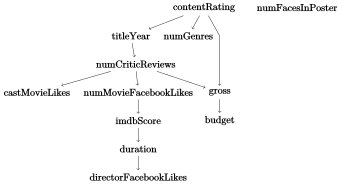

In [11]:
#greedy hill climbing
params2 = GreedyHillClimbing(ScoreComponentCache(dataDiscretized), max_n_parents=3, prior=UniformPrior())
bn2 = fit(DiscreteBayesNet, dataDiscretized, params2)

In [ ]:
bayesian_score(bn, dataDiscretizedTrain)

In [12]:
function likelihoodWeightedSampling(table, value)
    numerator = 0
    denominator = 0  
    for i = 1:length(table[:,1])
        row = table[i,:]
        if row[:gross][1] == value
            numerator = numerator + row[:p][1]
        end
        denominator = denominator + row[:p][1]
    end
    return numerator./denominator
end

likelihoodWeightedSampling (generic function with 1 method)

In [13]:
#getMostLikelyClass(table,5)

In [14]:
function getMostLikelyClass(table,numClasses)
    highestLikelihood = 0
    mostLikelyClass = -1
    classProbabilities = zeros(numClasses)
    for i = 1:length(table[:,1])
        row = table[i,:]
        grossCategory = row[:gross][1]
        classProbabilities[grossCategory]+= row[:p][1]
        if classProbabilities[grossCategory] > highestLikelihood
            highestLikelihood = classProbabilities[grossCategory]
            mostLikelyClass = grossCategory
        end
    end
    return mostLikelyClass
end

getMostLikelyClass (generic function with 1 method)

In [15]:
function getPredictionError(testDataTable)
    numMistakes = 0
    for i = 1:length(testDataTable[:,1])
        row = testDataTable[i,:]
        gross = row[:gross][1]
        budget = row[:budget][1]
        imdbScore = row[:imdbScore][1]
        numCriticReviews = row[:numCriticReviews][1]
        numGenres = row[:numGenres][1]
        println(i)
        table = rand_table_weighted(bn2; nsamples=1000, consistent_with=Assignment(:budget=>budget,:imdbScore=>imdbScore,:numCriticReviews=>numCriticReviews, :numGenres=>numGenres))
        #println("here") 
        estimatedTable = estimate(table)
        
        predictedGrossCategory = getMostLikelyClass(estimatedTable,nbinsSmall)
        
        if predictedGrossCategory != gross
            numMistakes += 1
        end
        
    end
    return numMistakes/length(testDataTable[:,1])
end

getPredictionError (generic function with 1 method)

In [16]:
getPredictionError(dataDiscretizedTest)

1


LoadError: LoadError: UndefVarError: nbinsSmall not defined
while loading In[16], in expression starting on line 1

In [ ]:
## DEBUGGING CODE - IGNORE.
row = dataDiscretizedTest[34,:]
display(row)
display(critic_edges)
#table(bn, :numCriticReviews)
#count(bn, :numCriticReviews, dataDiscretized)
table = rand_table_weighted(bn; nsamples=1000, consistent_with=Assignment(:budget=>1,:imdbScore=>6,:numCriticReviews=>4, :numGenres=>3))
#estimatedTable = estimate(table)